C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Customer Segments:
    CustomerID  Age  Annual_Income_k$  Spending_Score  Cluster
0            1   25                15              39        2
1            2   34                29              81        1
2            3   45                45               6        3
3            4   23                21              77        1
4            5   35                54              40        0
5            6   64                80              15        3
6            7   33                40              82        1
7            8   48                60              50        0
8            9   50                65              46        0
9           10   29                20              75        1
10          11   41                50              42        0
11          12   60                85              10        3
12          13   38                43              94        1
13          14   27                23              73        1
14          15   49                

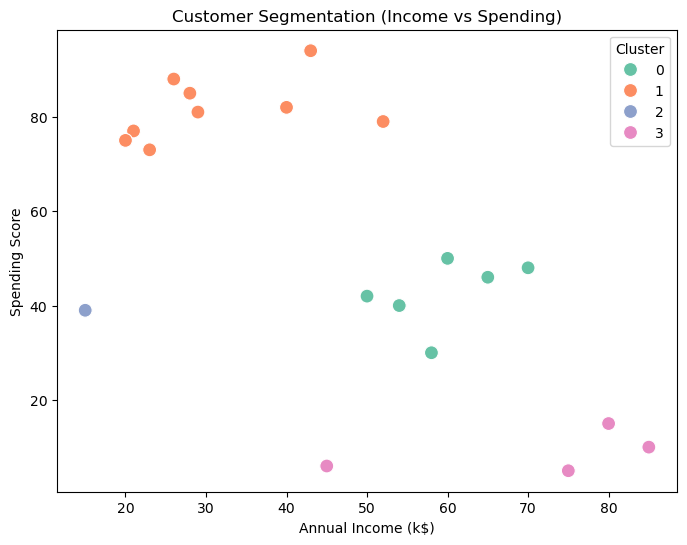

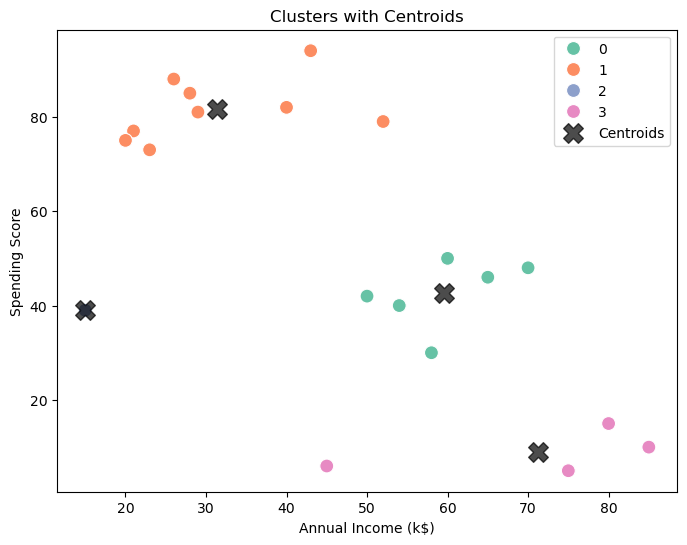

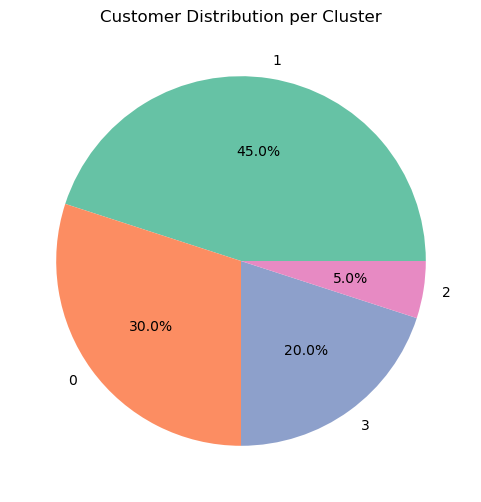


Average characteristics of each segment:
               Age  Annual_Income_k$  Spending_Score
Cluster                                             
0        43.833333         59.500000       42.666667
1        31.000000         31.333333       81.555556
2        25.000000         15.000000       39.000000
3        56.000000         71.250000        9.000000


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

data = {
    'CustomerID': range(1, 21),
    'Age': [25,34,45,23,35,64,33,48,50,29,41,60,38,27,49,31,55,36,40,28],
    'Annual_Income_k$': [15,29,45,21,54,80,40,60,65,20,50,85,43,23,70,28,75,52,58,26],
    'Spending_Score': [39,81,6,77,40,15,82,50,46,75,42,10,94,73,48,85,5,79,30,88]
}

df = pd.DataFrame(data)

X = df[['Annual_Income_k$', 'Spending_Score']]

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

print("\nCustomer Segments:")
print(df[['CustomerID', 'Age', 'Annual_Income_k$', 'Spending_Score', 'Cluster']])

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual_Income_k$', 
    y='Spending_Score', 
    hue='Cluster', 
    palette='Set2', 
    data=df,
    s=100
)
plt.title("Customer Segmentation (Income vs Spending)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual_Income_k$', 
    y='Spending_Score', 
    hue='Cluster', 
    palette='Set2', 
    data=df,
    s=100
)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.7, marker='X', label='Centroids')
plt.title("Clusters with Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
df['Cluster'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("Customer Distribution per Cluster")
plt.ylabel("")
plt.show()

print("\nAverage characteristics of each segment:")
print(df.groupby('Cluster')[['Age', 'Annual_Income_k$', 'Spending_Score']].mean())
